In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from jmodt.utils.calibration import Calibration
from jmodt.utils.kitti_utils import get_objects_from_label, boxes3d_to_corners3d


In [2]:
import os

calib_dir = "/home/umusa/JMODT/data/tracking/training/calib/"
if os.path.exists(calib_dir):
    print("Calibration files:", os.listdir(calib_dir))
else:
    print("Directory not found:", calib_dir)

Calibration files: ['0004.txt', '0006.txt', '0000.txt', '0010.txt', '0013.txt', '0014.txt', '0019.txt', '0008.txt', '0018.txt', '0015.txt', '0016.txt', '0012.txt', '0002.txt', '0009.txt', '0005.txt', '0017.txt', '0001.txt', '0011.txt', '0007.txt', '0003.txt', '0020.txt']


In [3]:
# Path to calibration file
calib_file = "/home/umusa/JMODT/data/tracking/training/calib/0001.txt"

In [4]:
# Initialize Calibration
calib = Calibration(calib_file)

In [5]:
# Display calibration parameters
print("P2 Matrix:\n", calib.P2)
print("R0 Rect:\n", calib.R0)
print("V2C (LiDAR-to-Camera):\n", calib.V2C)

P2 Matrix:
 [[7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01]
 [0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01]
 [0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03]]
R0 Rect:
 [[ 0.9999239   0.00983776 -0.00744505]
 [-0.0098698   0.9999421  -0.00427846]
 [ 0.00740253  0.00435161  0.9999631 ]]
V2C (LiDAR-to-Camera):
 [[ 7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03]
 [ 1.480249e-02  7.280733e-04 -9.998902e-01 -7.631618e-02]
 [ 9.998621e-01  7.523790e-03  1.480755e-02 -2.717806e-01]]


In [6]:
import cv2

img_path = "/home/umusa/JMODT/data/tracking/training/image_02/0001/000001.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

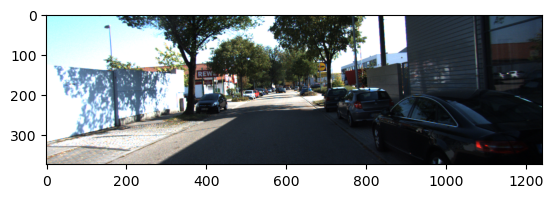

In [7]:
plt.imshow(img_rgb)

Text(0.5, 1.0, 'RGB Image')

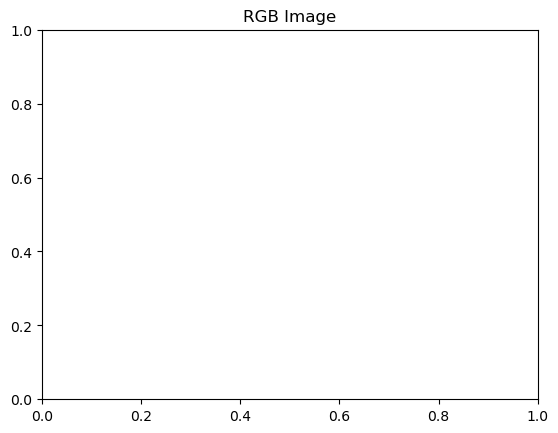

In [8]:
plt.title("RGB Image")

In [9]:
plt.show()

In [10]:
lidar_file = "/home/umusa/JMODT/data/tracking/training/velodyne/0001/000001.bin"
lidar_points = np.fromfile(lidar_file, dtype=np.float32).reshape(-1, 4)

In [11]:
print("Loaded LiDAR Points Shape:", lidar_points.shape)

Loaded LiDAR Points Shape: (120867, 4)


# Step 4: Project LiDAR Points onto the Image

Use Calibration.lidar_to_img() to project LiDAR points onto the RGB image:

In [12]:
# Extract only (x, y, z) from LiDAR points
pts_lidar = lidar_points[:, :3]

In [13]:
# Project LiDAR points to Image Plane
pts_img, pts_depth = calib.lidar_to_img(pts_lidar)

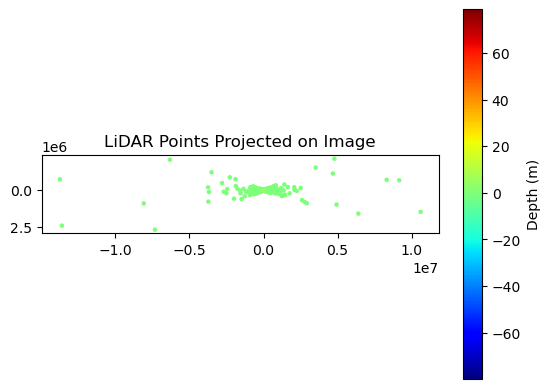

In [14]:
# Visualize
plt.imshow(img_rgb)
plt.scatter(pts_img[:, 0], pts_img[:, 1], c=pts_depth, s=5, cmap='jet')
plt.colorbar(label="Depth (m)")
plt.title("LiDAR Points Projected on Image")
plt.show()

# Step 5: Visualize 3D Bounding Boxes

Use kitti_utils to load the KITTI labels and project bounding boxes:

In [15]:
label_file = "/home/umusa/JMODT/data/tracking/training/label_02/0001.txt"

In [16]:
if not os.path.exists(calib_file):
    raise FileNotFoundError(f"Calibration file not found at: {calib_file}")


In [17]:
if img is None:
    raise FileNotFoundError(f"Image file not found or corrupted: {img_path}")


In [18]:
if not os.path.exists(lidar_file):
    raise FileNotFoundError(f"LiDAR file not found at: {lidar_file}")


In [20]:
# Load Objects
objects = get_objects_from_label(label_file)

In [21]:
# Convert to 3D corners
boxes3d = np.array([[obj.pos[0], obj.pos[1], obj.pos[2], obj.h, obj.w, obj.l, obj.ry] for obj in objects])
corners3d = boxes3d_to_corners3d(boxes3d)

In [22]:
# Project 3D corners to Image
boxes, boxes_corner = calib.corners3d_to_img_boxes(corners3d)

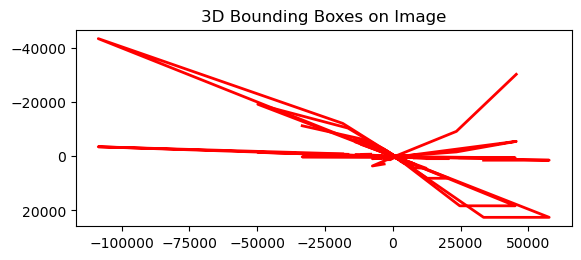

In [23]:
# Visualize 3D Bounding Boxes on Image
plt.imshow(img_rgb)
for i in range(boxes.shape[0]):
    plt.plot(boxes_corner[i, :, 0], boxes_corner[i, :, 1], 'r-', lw=2)
plt.title("3D Bounding Boxes on Image")
plt.show()

# Visualizing the 3D

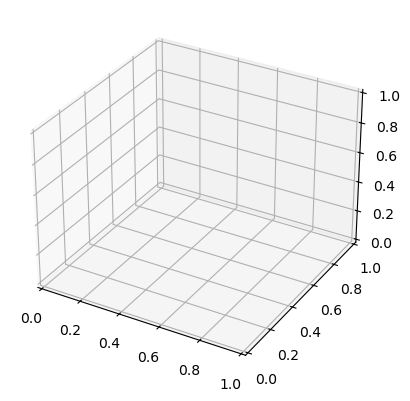

In [24]:
#Visualizing the 3D

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [25]:
# Plot LiDAR Points
ax.scatter(pts_lidar[:, 0], pts_lidar[:, 1], pts_lidar[:, 2], c='b', s=1)

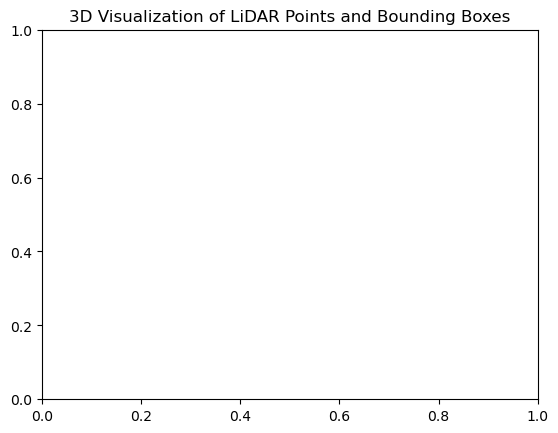

In [26]:
#Plot Bounding Boxes
for i in range(corners3d.shape[0]):
    ax.plot(corners3d[i, :, 0], corners3d[i, :, 1], corners3d[i, :, 2], 'r-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Visualization of LiDAR Points and Bounding Boxes")
plt.show()


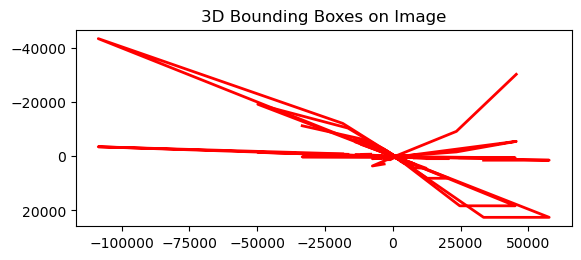

In [27]:
# Code functionality
# Loading and visualizing 2D BB on image

plt.imshow(img_rgb)
for i in range(boxes.shape[0]):
    plt.plot(boxes_corner[i, :, 0], boxes_corner[i, :, 1], 'r-', lw=2)
plt.title("3D Bounding Boxes on Image")
plt.show()

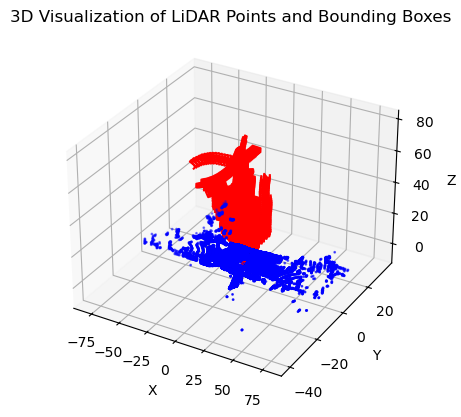

In [28]:
#3D Visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot LiDAR Points
ax.scatter(pts_lidar[:, 0], pts_lidar[:, 1], pts_lidar[:, 2], c='b', s=1)

# Plot Bounding Boxes
for i in range(corners3d.shape[0]):
    ax.plot(corners3d[i, :, 0], corners3d[i, :, 1], corners3d[i, :, 2], 'r-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Visualization of LiDAR Points and Bounding Boxes")
plt.show()


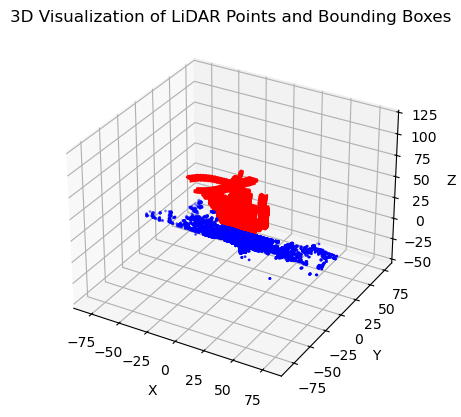

In [29]:
# mproved Axes Scaling for 3D Visualization

def set_axes_equal(ax):
    """Set 3D plot axes to equal scale for proper visualization."""
    limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
    center = np.mean(limits, axis=1)
    range_ = 0.5 * np.max(limits[:, 1] - limits[:, 0])
    ax.set_xlim3d([center[0] - range_, center[0] + range_])
    ax.set_ylim3d([center[1] - range_, center[1] + range_])
    ax.set_zlim3d([center[2] - range_, center[2] + range_])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot LiDAR Points
ax.scatter(pts_lidar[:, 0], pts_lidar[:, 1], pts_lidar[:, 2], c='b', s=1)

# Plot Bounding Boxes
for i in range(corners3d.shape[0]):
    ax.plot(corners3d[i, :, 0], corners3d[i, :, 1], corners3d[i, :, 2], 'r-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
set_axes_equal(ax)  # Equal scaling
plt.title("3D Visualization of LiDAR Points and Bounding Boxes")
plt.show()
